# Introdução à Recuperação de Informações

## Lista de exercícios 2

Todos os exercícios requerem uma implementação funcional do problema, no corpo do notebook. Para cada exercício consultas de teste devem ser propostas para demonstrar que a implementação atende aos requisitos do exercício.
As resposta devem ser enviadas como um notebook (.ipynb) para o professor.

In [235]:
from nltk.corpus import machado
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.text import TextCollection
import string
from collections import defaultdict
from nltk.stem.snowball import PortugueseStemmer
import nltk
import numpy as np
from math import log
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import plotly.plotly as py
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Exercício 1: Similaridade por Cosseno.

Com base na metodologia apresentada na Prática 2, usando o corpus de Machado, Construa vetorizações, binárias, por frequência e por tf-idf. Compare a ordenação dos resultados para uma consulta qualquer, com pelo menos 3 palavras. Para a ordenação dos resultados, use o cosseno entre os vetores da consulta e dos documentos.

In [236]:
textos = [machado.raw(id) for id in machado.fileids()]
len(textos)

246

In [237]:
tok_textos = [WordPunctTokenizer().tokenize(t.lower()) for t in textos]
len(set(tok_textos[0]))

7483

In [238]:
vocab = set([])
for t in tok_textos:
    vocab = vocab.union(set(t))
vocab = map(lambda x:x.lower(),vocab)
vocab = list(set(vocab))
print(len(vocab))
vocab[:3]

66169


['caranguejos', 'escrevessem', 'nordeste']

In [239]:
T = nltk.TextCollection(tok_textos)

In [240]:
q = "amor moça bonita"
qt = WordPunctTokenizer().tokenize(q.lower())

#### Vetorização binária:

In [241]:
binary_matrix = np.zeros((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i in range(len(tok_textos)):
        if w in tok_textos[i]:
            binary_matrix[i,j] = 1
        else:
            binary_matrix[i,j] = 0

In [242]:
from numpy.linalg import norm
MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in binary_matrix])

In [243]:
def ordem_bin(q):
    return [np.dot(q,r) for r in MN]

In [244]:
A = np.array([1, 1, 1])
norm(A)
B = np.array([w/norm(A) for w in A])

In [245]:
r = ordem_bin(B)
v=filter(lambda x : x[0]!=0.0, zip(r,range(len(tok_textos))))
resposta = sorted(v, reverse=True) 

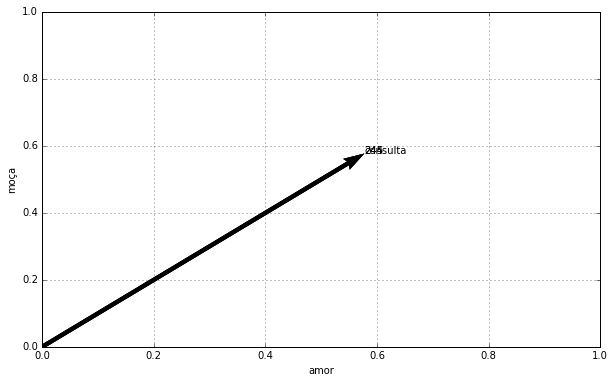

In [246]:
fig_bin = plt.figure(figsize=(10,6))
ax = plt.gca()
docs = 2
vecs = [B[:2]]
for d in resposta[:docs]:
    vecs.append(MN[d[1]][:2])
    x,y = MN[d[1]][:2]
    plt.text(x,y,'{}'.format(d[1]))
U, V = zip(*vecs)
x,y = zeros(docs+1), zeros(docs+1)
plt.text(U[0],V[0],'consulta')
plt.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('amor')
ax.set_ylabel('moça')
ax.quiver(x,y,U,V,angles='xy',scale_units='xy', scale=1.0);

#### Vetorização por frequência:

In [247]:
def freq_w_d(w,d):
    freq = []
    w = w.lower()
    for i in d:
        if i == w:
            freq.append(i)
        else:
            pass
    return len(freq)

In [248]:
freq_matrix = np.zeros((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i in range(len(tok_textos)):
        if freq_w_d(qt[j], tok_textos[i]) == 0:
            freq_matrix[i,j] = 0
        else:
            freq_matrix[i,j] = 1 + log(freq_w_d(qt[j], tok_textos[i]))

In [249]:
from numpy.linalg import norm
MN_freq = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in freq_matrix])     

In [250]:
def ordem_freq(q):
    return [np.dot(q,r) for r in MN_freq]

In [251]:
def n_t(x):
    x = x.lower()
    y = 0
    for i in range(len(tok_textos)):
        if x in tok_textos[i]:
            y += 1
            
        else:
            pass
        return y

In [252]:
C = np.array([log(1 + len(tok_textos)/n_t(qt[0])), log(1 + len(tok_textos)/n_t(qt[1])), log(1 + len(tok_textos)/n_t(qt[2]))])
D = np.array([w/norm(C) for w in C])
r_freq = ordem_bin(D)
v_freq=filter(lambda x : x[0]!=0.0, zip(r_freq,range(len(tok_textos))))
resposta_freq = sorted(v_freq, reverse=True) 

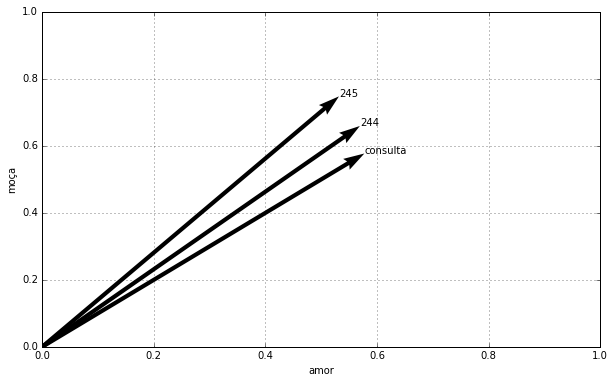

In [253]:
fig_freq = plt.figure(figsize=(10,6))
ax = plt.gca()
docs = 2
vecs = [D[:2]]
for d in resposta[:docs]:
    vecs.append(MN_freq[d[1]][:2])
    x,y = MN_freq[d[1]][:2]
    plt.text(x,y,'{}'.format(d[1]))
U, V = zip(*vecs)
x,y = zeros(docs+1), zeros(docs+1)
plt.text(U[0],V[0],'consulta')
plt.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('amor')
ax.set_ylabel('moça')
ax.quiver(x,y,U,V,angles='xy',scale_units='xy', scale=1.0);

#### Vetorização por TF-IDF:

In [254]:
tfidf_matrix = np.zeros((len(tok_textos),len(qt)))
for j,w in enumerate(qt):
    for i, d in enumerate(tok_textos):
        tfidf_matrix[i,j] = T.tf_idf(w,d)
tfidf_matrix.shape

(246, 3)

In [255]:
from numpy.linalg import norm
MN = np.array([r/norm(r) if norm(r) !=0 else np.zeros(len(r)) for r in tfidf_matrix])
def ordem(q):
    return [np.dot(q,r) for r in MN]
# calculando o tf-idf dos termos na consulta, considerando q um documento da Coleção...
# O que equivale a vetorizar a consulta.
qv = np.array([T.tf_idf(w,qt) for w in qt])
qv /= norm(qv)
r = ordem(qv)
v=filter(lambda x : x[0]!=0.0, zip(r,range(len(tok_textos))))
print(qv)
resposta = sorted(v, reverse=True) 

[ 0.25096031  0.4777429   0.84189111]


In [257]:
for sim,tid in resposta: 
    fd=nltk.FreqDist(WordPunctTokenizer().tokenize(textos[tid].lower()))
    print("Ocorrências dos termos de busca no texto {}: ".format(tid),fd['amor'],fd['moça'],fd['bonita'])

Ocorrências dos termos de busca no texto 94:  1 1 1
Ocorrências dos termos de busca no texto 57:  3 2 2
Ocorrências dos termos de busca no texto 68:  3 2 2
Ocorrências dos termos de busca no texto 121:  2 4 3
Ocorrências dos termos de busca no texto 235:  8 4 6
Ocorrências dos termos de busca no texto 123:  1 4 3
Ocorrências dos termos de busca no texto 102:  2 1 2
Ocorrências dos termos de busca no texto 230:  20 25 15
Ocorrências dos termos de busca no texto 241:  4 3 2
Ocorrências dos termos de busca no texto 134:  0 1 1
Ocorrências dos termos de busca no texto 108:  0 1 1
Ocorrências dos termos de busca no texto 34:  0 5 4
Ocorrências dos termos de busca no texto 125:  7 7 4
Ocorrências dos termos de busca no texto 192:  3 1 2
Ocorrências dos termos de busca no texto 3:  36 20 15
Ocorrências dos termos de busca no texto 229:  34 46 23
Ocorrências dos termos de busca no texto 219:  3 4 2
Ocorrências dos termos de busca no texto 72:  1 2 1
Ocorrências dos termos de busca no texto 87:

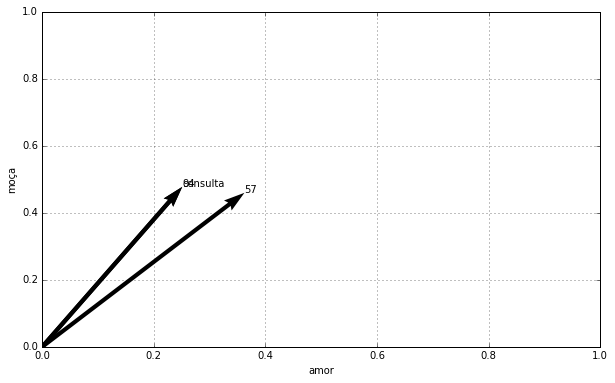

In [259]:
fig = plt.figure(figsize=(10,6))
ax = plt.gca()
docs = 2
vecs = [qv[:2]]
for d in resposta[:docs]:
    vecs.append(MN[d[1]][:2])
    x,y = MN[d[1]][:2]
    plt.text(x,y,'{}'.format(d[1]))
U, V = zip(*vecs)
x,y = zeros(docs+1), zeros(docs+1)
plt.text(U[0],V[0],'consulta')
plt.grid()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('amor')
ax.set_ylabel('moça')
ax.quiver(x,y,U,V,angles='xy',scale_units='xy', scale=1.0);

### Exercício 2: Explorando o conceito de similaridade

Construa uma matriz de similaridade (cossenos entre vetores de frequência) entre todos os textos de machado. 
Construa um histograma com os valores de similaridade, excluindo os 0s e 1s. Interprete.

In [220]:
vetor = TfidfVectorizer(min_df=1)
tfidf = vetor.fit_transform(textos)
Matriz = (tfidf * tfidf.T).A
print (Matriz)

[[ 1.          0.81896149  0.83046457 ...,  0.29386488  0.65654999
   0.58979922]
 [ 0.81896149  1.          0.84636708 ...,  0.2857949   0.66699573
   0.59418853]
 [ 0.83046457  0.84636708  1.         ...,  0.28538606  0.70631686
   0.6081249 ]
 ..., 
 [ 0.29386488  0.2857949   0.28538606 ...,  1.          0.21823833
   0.21724236]
 [ 0.65654999  0.66699573  0.70631686 ...,  0.21823833  1.          0.49688348]
 [ 0.58979922  0.59418853  0.6081249  ...,  0.21724236  0.49688348  1.        ]]


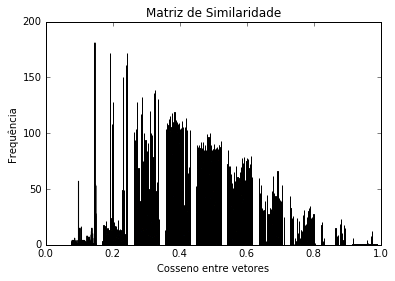

In [221]:
plt.hist(Matriz)          
plt.title("Matriz de Similaridade")
plt.xlabel("Cosseno entre vetores")
plt.ylabel("Frequência")


### Exercício 3: Usando o Gensim
Instale o Gensim, se ainda não o tiver. Seguindo o início deste tutorial: https://radimrehurek.com/gensim/tut2.html, construa um corpus usando as classes do Gensim, mas com os textos de Machado.

In [222]:
from gensim import corpora, models, similarities
from nltk.corpus import stopwords
from nltk.stem.snowball import PortugueseStemmer
from collections import Counter
from string import punctuation

In [223]:
sw = stopwords.words('portuguese')+ list(punctuation)
stemmer = PortugueseStemmer()

In [224]:
textos_limpos = []
c = Counter([])
for texto in textos:
    tlimpo = [stemmer.stem(token.lower()) for token in WordPunctTokenizer().tokenize(texto) if token not in sw]
    c.update(tlimpo)
    textos_limpos.append(tlimpo)
textos_limpos = [[token for token in t if c[token]>1] for t in textos_limpos]

In [225]:
dicionario = corpora.Dictionary(textos_limpos)
dicionario.save('vocabulario.dict')
print(dicionario)

Dictionary(18169 unique tokens: ['argel', 'estanh', 'repost', 'bronquit', 'açul']...)


In [232]:
corpus = [dicionario.doc2bow(d) for d in textos_limpos]
#print(corpus)

### Exercício 4: Indexação Semântica Latente.

Ainda seguindo  o tutorial citado no exercício anterior, ajuste um modelo LSI para os documentos de machado. Interprete os resultados.

In [227]:
tfidf = models.TfidfModel(corpus)

In [228]:
corpus_tfidf = tfidf[corpus]
#for doc in corpus_tfidf:
#    print(doc)

In [229]:
lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=2)
corpus_lsi = lsi[corpus_tfidf]

In [230]:
lsi.print_topics(2)

[(0,
  '0.344*"--" + 0.270*"\x97" + 0.104*"sr" + 0.086*"poet" + 0.078*"luís" + 0.070*"..." + 0.061*"d" + 0.060*"crític" + 0.057*"camil" + 0.057*"vers"'),
 (1,
  '0.866*"--" + -0.244*"\x97" + 0.078*"félix" + 0.070*"helen" + 0.052*"cavalc" + 0.050*"beatriz" + 0.049*"oliv" + 0.046*"elis" + 0.043*"estáci" + 0.043*"lalau"')]

In [231]:
for doc in corpus_lsi: 
    print(doc)

[(0, 0.33927447814519496), (1, -0.1433103274229369)]
[(0, 0.47197344459087742), (1, 0.6144092938016944)]
[(0, 0.39661001962092196), (1, -0.18032865145427499)]
[(0, 0.49385636238754821), (1, -0.21996762385058305)]
[(0, 0.43669002212331526), (1, -0.19484991953285394)]
[(0, 0.30111556689560665), (1, -0.12886837899405432)]
[(0, 0.41138260938512389), (1, -0.20378005343819172)]
[(0, 0.19757170592984899), (1, -0.096198543396806085)]
[(0, 0.22297797141329856), (1, -0.072715708251779199)]
[(0, 0.13805458669757337), (1, -0.052541698893815651)]
[(0, 0.10871693786283858), (1, -0.051736783087305172)]
[(0, 0.17879223243879103), (1, -0.081052338126808926)]
[(0, 0.15238590884795075), (1, -0.050701227806008942)]
[(0, 0.18708695877819184), (1, -0.095060301832528477)]
[(0, 0.29839335169409681), (1, -0.11526136238661687)]
[(0, 0.20496334341741523), (1, -0.099221074373396015)]
[(0, 0.22291863450406954), (1, -0.11690224333461269)]
[(0, 0.10278555511019719), (1, -0.050249742548271248)]
[(0, 0.111444353555677